In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c/titanic/train.csv
/kaggle/input/c/titanic/test.csv
/kaggle/input/c/titanic/gender_submission.csv


In [2]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

2022-02-05 03:08:18.592575: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-02-05 03:08:18.592690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
gender_submission = pd.read_csv(r"../input/c/titanic/gender_submission.csv")
train_data = pd.read_csv(r"../input/c/titanic/train.csv")
test_data = pd.read_csv(r"../input/c/titanic/test.csv")

In [4]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
print("The shape of train_data = ",train_data.shape)
print("The shape of test_data = ",test_data.shape)

The shape of train_data =  (891, 12)
The shape of test_data =  (418, 11)


In [8]:
X_train=train_data.drop(['PassengerId','Name','Ticket','Survived','Fare'],axis=1)
y_train=train_data['Survived']

X_test=test_data.drop(['PassengerId','Name','Ticket','Fare'],axis=1)
y_test=gender_submission['Survived']

In [9]:
print("Train_data:")
print(X_train.isnull().any())
print("--------------------")
print("Test_data:")
print(X_test.isnull().any())

Train_data:
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Cabin        True
Embarked     True
dtype: bool
--------------------
Test_data:
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Cabin        True
Embarked    False
dtype: bool


In [10]:
print(X_train['Cabin'].count(None))
print(X_test['Cabin'].count(None))

204
91


In [11]:
X_train['Age']=X_train['Age'].fillna(X_train['Age'].dropna().median())
X_test['Age']=X_test['Age'].fillna(X_test['Age'].dropna().median())

In [12]:
def Sex_transform(df):
    df['Sex']=pd.Categorical(df['Sex'])
    df['Sex']=df['Sex'].cat.codes
    return df
def Embark_transform(df):
    df['Embarked']=pd.Categorical(df['Embarked'])
    df['Embarked']=df['Embarked'].cat.codes
    return df
def Cabins_transform(df):
    df['Cabin'] = df['Cabin'].fillna('S')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    df['Cabin'] =  pd.Categorical(df['Cabin'])
    df['Cabin'] = df['Cabin'].cat.codes 
    return df
def Fare_standard(df):
    df['Fare']=(df['Fare']-df['Fare'].mean())/df['Fare'].std()
    return df
def Age_standard(df):
    df['Age']=(df['Age']-df['Age'].mean())/df['Age'].std()

In [13]:
def transform(df):
    Sex_transform(df)
    Embark_transform(df)
    Cabins_transform(df)
    #Fare_standard(df)
    Age_standard(df)

transform(X_train)
transform(X_test)

In [14]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train.shape

(891, 7)

In [15]:
model=Sequential()

model.add(Dense(units=64,activation='relu',input_shape=(7,)))
model.add(Dropout(0.25))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=16,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

2022-02-05 03:08:24.362166: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-05 03:08:24.365515: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-02-05 03:08:24.365561: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-05 03:08:24.365591: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (53e8ae997c77): /proc/driver/nvidia/version does not exist
2022-02-05 03:08:24.366952: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [16]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['binary_accuracy'])
early_stop=EarlyStopping(monitor='val_loss',patience=20)

In [17]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.5,callbacks=[early_stop])

2022-02-05 03:08:24.655005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-05 03:08:24.668923: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/100
14/14 [==============================] - 1s 47ms/step - loss: 0.6672 - binary_accuracy: 0.5807 - val_loss: 0.6306 - val_binary_accuracy: 0.6480
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6509 - binary_accuracy: 0.5916 - val_loss: 0.6231 - val_binary_accuracy: 0.6771
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6328 - binary_accuracy: 0.6068 - val_loss: 0.6026 - val_binary_accuracy: 0.6816
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6524 - binary_accuracy: 0.6089 - val_loss: 0.6013 - val_binary_accuracy: 0.7085
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6469 - binary_accuracy: 0.6302 - val_loss: 0.5914 - val_binary_accuracy: 0.6682
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6276 - binary_accuracy: 0.6593 - val_loss: 0.5875 - val_binary_accuracy: 0.6816
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - lo

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

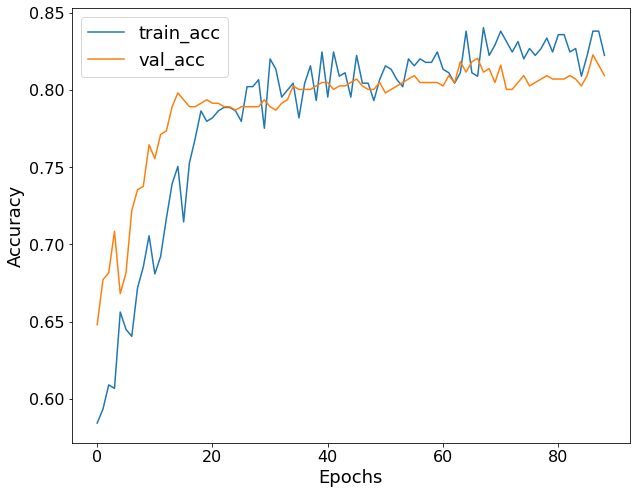

In [18]:
plt.figure(figsize=(10,8))
plt.plot(history.history['binary_accuracy'],label='train_acc')
plt.plot(history.history['val_binary_accuracy'],label='val_acc')
plt.legend(fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

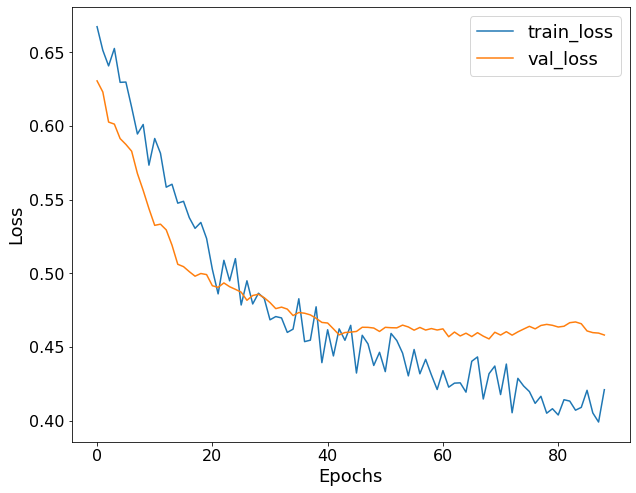

In [19]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [20]:
predictions = model.predict_classes(X_test)
ids = test_data['PassengerId'].copy()
output = ids.to_frame()
output["Survived"]=predictions
output.head(10)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [21]:
output.to_csv("submission.csv",index=False)